# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [68]:
#Your code here
df2 = df.rename(str.lower, axis='columns')
df2.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

## Change the Index to be the Line Names

In [69]:
#Your code here
df2.set_index('linename', inplace=True)
df2.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the index back

In [70]:
# Your code here
df2.reset_index(inplace=True)
df2.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order
*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [71]:
# Your code here
df2['Num_Lines'] = df2.linename.map(len)
df2.sort_values(by='Num_Lines', ascending=False)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,08/30/2018,00:00:00,REGULAR,1417952,3267016,12
2686,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/29/2018,16:00:00,REGULAR,2836145,3311412,12
2673,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,16:00:00,REGULAR,2830710,3305818,12
2674,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,20:00:00,REGULAR,2832048,3306310,12
2675,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,00:00:00,REGULAR,2832325,3306433,12
2676,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,04:00:00,REGULAR,2832359,3306438,12
2677,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,08:00:00,REGULAR,2832561,3306716,12
2678,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,09:57:08,REGULAR,2832815,3307705,12
2679,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,12:00:00,REGULAR,2832994,3308064,12
2680,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,16:00:00,REGULAR,2833390,3308536,12


## Write a function to clean a column name

In [72]:
def clean(col_name):
    cleaned = col_name.strip().lower()
    return cleaned

In [73]:
# This is a list comprehension. It applies your clean function to every item in the list.
# We then reassign that to df.columns
# You shouldn't have to change anything here.
# Your function above should work appropriately here.
#df.columns = [clean(col) for col in df.columns] 
df2.columns = [clean(col) for col in df2.columns] 

In [74]:
# Checking the output, we can see the results.
#df.columns
df2.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

## Group the Data by Day of Week and Plot the Sum of The Numeric Columns

In [77]:
# Your code here

# first let's make another copy of the DF in case we want to use df2 before we convert to the datetime64 dt
df3 = df2.copy()

df3.date = pd.to_datetime(df3.date)
df3['day_of_week'] = df3.date.dt.day_name()
grouped = df3.groupby(['day_of_week'])
grouped

In [123]:
sum_of_grouped = grouped['entries', 'exits', 'num_lines'].sum()
sum_of_grouped

,entries,exits,num_lines
day_of_week,,,
Friday,1110224700078,906799065337,75573
Monday,1114237052454,911938153513,76110
Saturday,1115661545514,909142081474,74725
Sunday,1192306179082,959223750461,75306
Thursday,1122723988662,920691927110,76607
Tuesday,1143313287046,942230721477,77303
Wednesday,1123655222441,920630864687,75713


In [152]:
# but I don't like the ordering of the day_of_week, above, so let's fix that!

dict_day_offset = {'Sunday':0, 'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6}

sum_of_grouped.reset_index(inplace=True)
sum_of_grouped['day_offset'] = sum_of_grouped.day_of_week.map(dict_day_offset)
sum_of_grouped.sort_values(by='day_offset', inplace=True)
sum_of_grouped.set_index('day_of_week', inplace=True)
sum_of_grouped.drop(['day_offset'], axis=1, inplace=True)
sum_of_grouped

,entries,exits,num_lines
day_of_week,,,
Sunday,1192306179082,959223750461,75306
Monday,1114237052454,911938153513,76110
Tuesday,1143313287046,942230721477,77303
Wednesday,1123655222441,920630864687,75713
Thursday,1122723988662,920691927110,76607
Friday,1110224700078,906799065337,75573
Saturday,1115661545514,909142081474,74725


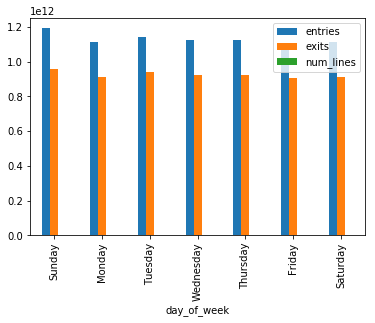

In [153]:
# now plot
sum_of_grouped.plot.bar()
plt.show()

## Group the Data by Weekend/Weekday and Plot the Sum of the Numeric Columns

In [154]:
#Your code here
dict_day_isweekend = {'Sunday':True, 'Saturday':True, 'Monday':False, 'Tuesday':False, 'Wednesday':False, 'Thursday':False, 'Friday':False}

df4 = df3.copy()
df4['is_weekend'] = df3.day_of_week.map(dict_day_isweekend)
grouped_by_weekend = df4.groupby(['is_weekend'])
sum_of_grouped_by_weekend = grouped_by_weekend['entries', 'exits', 'num_lines'].sum()
sum_of_grouped_by_weekend

,entries,exits,num_lines
is_weekend,,,
False,5614154250681,4602290732124,381306
True,2307967724596,1868365831935,150031


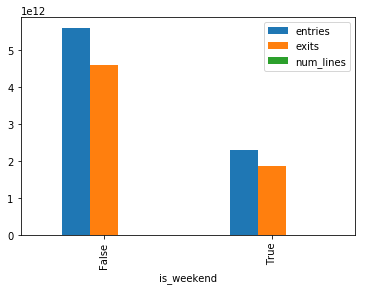

In [155]:
# now plot
sum_of_grouped_by_weekend.plot.bar()
plt.show()

## Analysis Question: 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here 
# Looking at each plot we don't see 'num_lines'
# That is because the scale is so disproportionate relative to the scale of entries and exits
# If we really wanted to make sense of num_lines, we should plot it separately (or drop the other columns)

## Drop a couple of columns

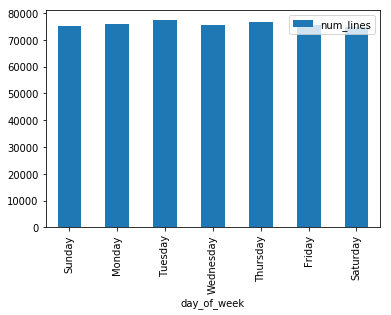

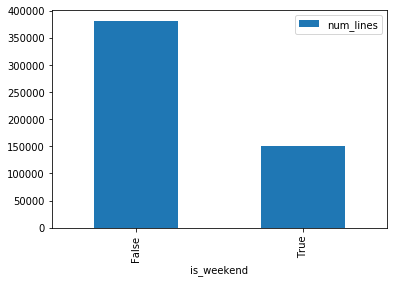

In [156]:
# Your code here
sum_of_grouped.drop(['entries', 'exits'], axis=1).plot.bar()
sum_of_grouped_by_weekend.drop(['entries', 'exits'], axis=1).plot.bar()

## Summary

Great! You practiced your data cleanup-skills using Pandas.